In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv("D:/Data Analysis/customer_purchase_data.csv")


In [48]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
data.tail(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1490,18,1,83126.660956,20,3,2.280306,0,1,0
1491,30,0,71611.955361,20,1,38.681686,0,5,1
1492,63,0,71874.591294,10,2,43.546243,0,1,0
1493,34,1,20418.374269,9,1,54.459955,0,0,0
1494,34,1,104649.186035,14,1,28.998117,0,1,0
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [5]:
data.shape

(1500, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [7]:
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [8]:
data.isnull()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [10]:
data.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [11]:
#Average no.of Purchase by their annualincome
purchase = data.groupby('AnnualIncome')['NumberOfPurchases'].count().mean()
print(purchase)

1.080691642651297


In [12]:
#highest to lowest numberof purchase by productCategory
product_labels = {0:"Electronics", 1:"Clothing", 2:"Home Goods", 3:"Beauty", 4:"Sports"}
data["ProductCategory"] = data["ProductCategory"].map(product_labels)
avg = data.groupby("ProductCategory")["NumberOfPurchases"].mean()
avg_sorted = avg.sort_values(ascending=False)
print(avg_sorted)                           

ProductCategory
Home Goods     11.000000
Clothing       10.468278
Sports         10.330218
Beauty         10.258741
Electronics    10.076125
Name: NumberOfPurchases, dtype: float64


In [13]:
#list the no.of purchases between 15-20
data[data['NumberOfPurchases'].between(15,20)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
3,24,1,137798.623120,19,Beauty,46.167059,0,4,1
4,31,1,99300.964220,19,Clothing,19.823592,0,0,1
6,39,1,126883.385286,16,Beauty,42.085384,1,4,1
8,43,0,102797.301269,20,Clothing,6.023475,0,3,0
9,20,1,63854.921080,16,Electronics,38.572466,0,5,1
...,...,...,...,...,...,...,...,...,...
1487,41,0,116615.115835,19,Home Goods,32.156017,0,1,0
1490,18,1,83126.660956,20,Beauty,2.280306,0,1,0
1491,30,0,71611.955361,20,Clothing,38.681686,0,5,1
1496,67,1,28775.331069,18,Home Goods,17.625707,0,1,1


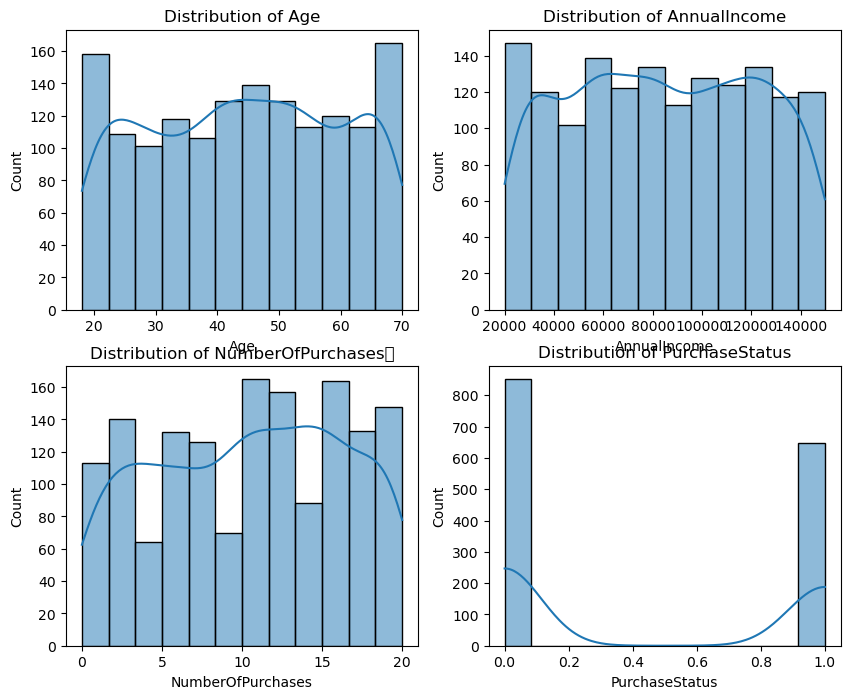

In [40]:
#histogram distribution of Age,Annualincome,Numberofpurchases,Purchasestatus
fig, a = plt.subplots(2,2, figsize = (10, 8))
sns.histplot(data['Age'], kde=True, ax=a[0,0])
a[0,0].set_title('Distribution of Age')

sns.histplot(data['AnnualIncome'], kde=True, ax=a[0,1])
a[0,1].set_title('Distribution of AnnualIncome')

sns.histplot(data['NumberOfPurchases'], kde=True, ax=a[1,0])
a[1,0].set_title('Distribution of NumberOfPurchases	')

sns.histplot(data['PurchaseStatus'], kde=True, ax=a[1,1])
a[1,1].set_title('Distribution of PurchaseStatus')
plt.show()


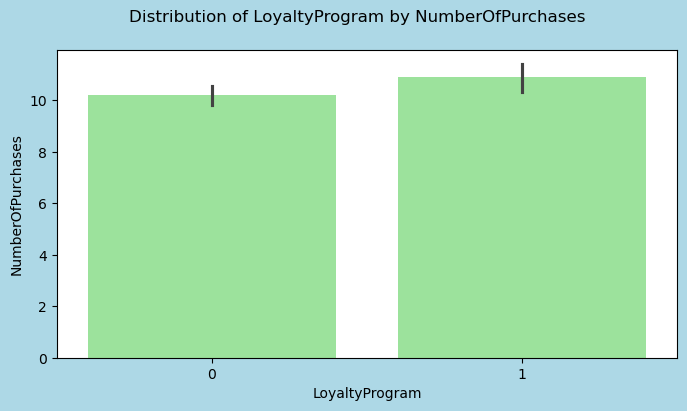

In [15]:
#Distribution of LoyaltyProgram by NumberOfPurchases

plt.figure(figsize=(8,4),facecolor="lightblue")
plt.suptitle('Distribution of LoyaltyProgram by NumberOfPurchases')
sns.barplot(x='LoyaltyProgram', y='NumberOfPurchases', data=data, color='lightgreen')
plt.show()

<Axes: xlabel='Age', ylabel='TimeSpentOnWebsite'>

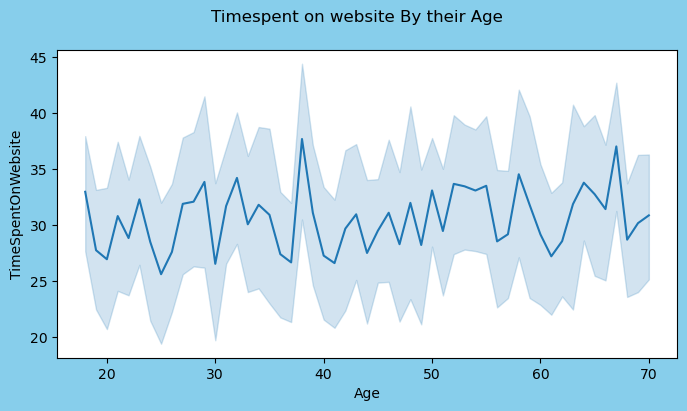

In [16]:
#Timespent on website By their Age

plt.figure(figsize=(8, 4),facecolor="skyblue")
plt.suptitle('Timespent on website By their Age')
sns.lineplot(data=data, x="Age", y="TimeSpentOnWebsite")

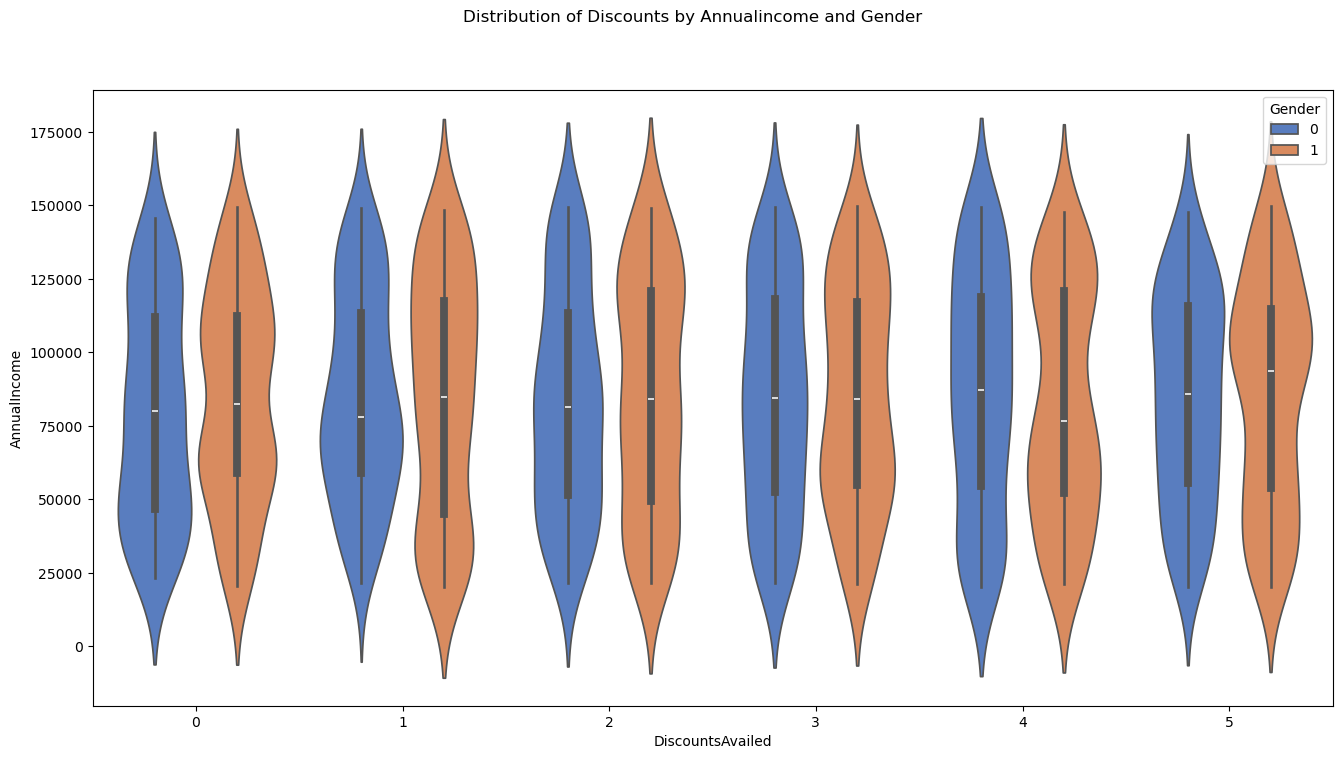

In [17]:
#Distribution of Discounts by Annualincome and Gende

plt.figure(figsize=(16, 8))
sns.violinplot(x='DiscountsAvailed', y='AnnualIncome', hue='Gender', data=data, palette="muted")
plt.suptitle('Distribution of Discounts by Annualincome and Gender')
plt.show()

In [42]:
#Distribution of Product Category by Gender

fig = plt.figure(figsize =(12,8) )
product_labels = {0:"Electronics", 1:"Clothing", 2:"Home Goods", 3:"Beauty", 4:"Sports"}
data['ProductCategory'] = data['ProductCategory'].map(product_labels)
sns.barplot(data=data,x= 'Gender',y= 'PurchaseStatus', hue = 'ProductCategory')
plt.suptitle('Distribution of Product Category by Gender')
plt.show()

KeyError: 'ProductCategory'

<Figure size 1200x800 with 0 Axes>

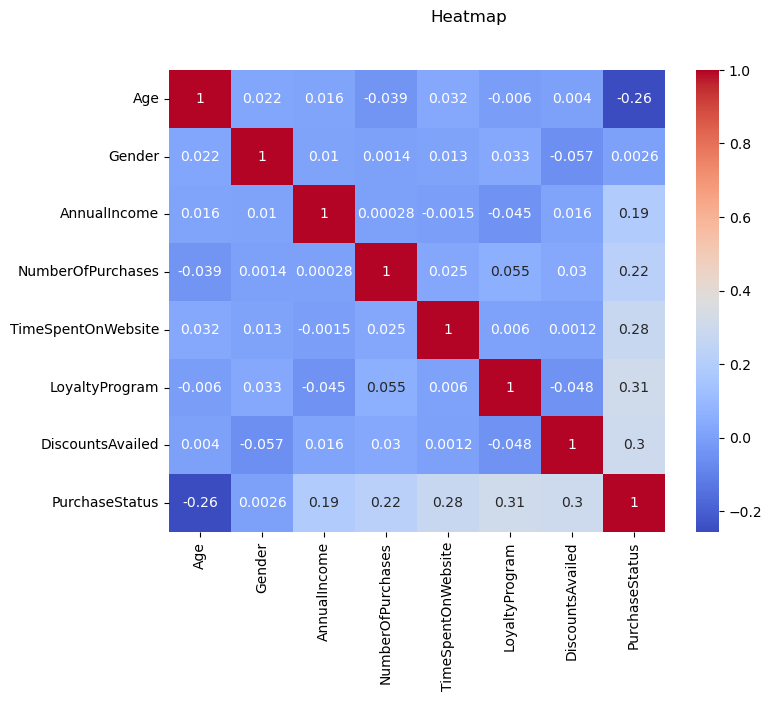

In [19]:
#correlation heatmap

plt.figure(figsize=(8, 6))
data.drop(['ProductCategory'],axis=1,inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.suptitle('Heatmap')
plt.show()